In [207]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px

In [208]:
churn_data = pd.read_csv('data/churn.csv')


In [209]:
churn_data.drop (columns=churn_data.columns [0], axis= 1 , inplace= True )
churn_data_1 = churn_data.copy()

In [210]:
churn_data_1['Exited'] = churn_data_1['Exited'].replace([0, 1],['Лояльные клиенты', 'Ушедшие клиенты'])
churn_data_1

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,Ушедшие клиенты
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,Лояльные клиенты
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,Ушедшие клиенты
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,Лояльные клиенты
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,Лояльные клиенты
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,Лояльные клиенты
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,Лояльные клиенты
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,Ушедшие клиенты
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,Ушедшие клиенты


9.1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

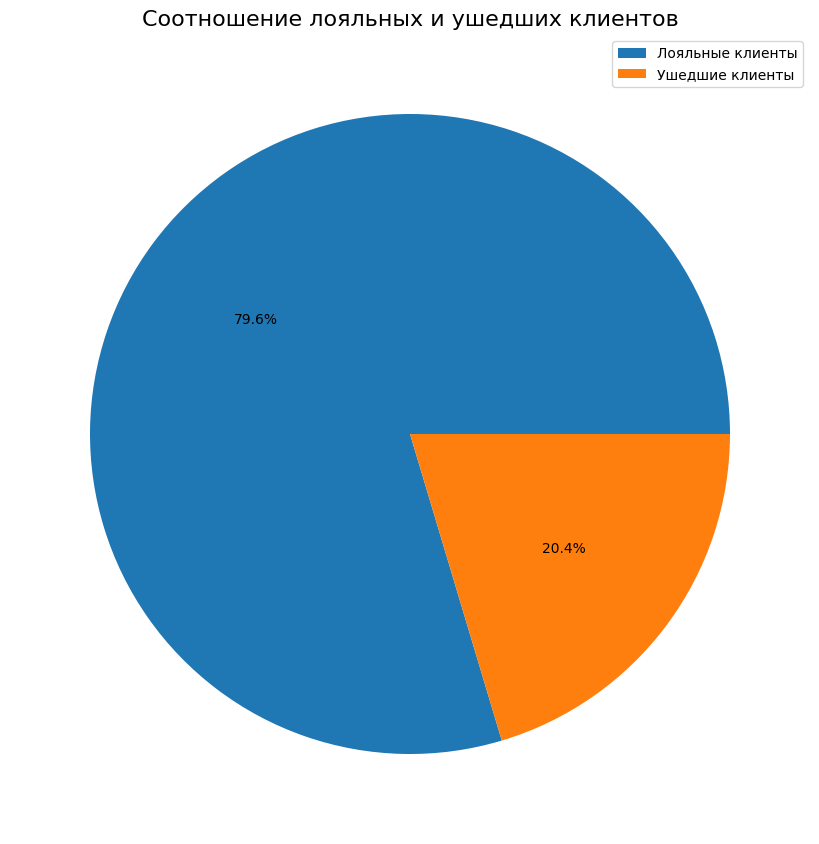

In [211]:
loyalexit_clients = churn_data_1['Exited'].value_counts()
fig = plt.figure(figsize=(8, 8))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    loyalexit_clients,
    autopct='%.1f%%'
);
axes.set_title('Соотношение лояльных и ушедших клиентов', fontsize=16)
axes.legend(loyalexit_clients.index)

На графике ярко видно, что внушительная примерно пятая часть клиентов ушла из анализируемого банка. С учетом того что мы анализируем 10000 клиентов, это около 2000 человек. Достаточно много, чтобы попытаться проанализировать их признаки, и попытаться построить модель, предсказывающую уход клиентов.

9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. 
Опишите распределение и сделайте выводы.

In [212]:
churn_data_2 = churn_data[churn_data['Balance'] > 2500]

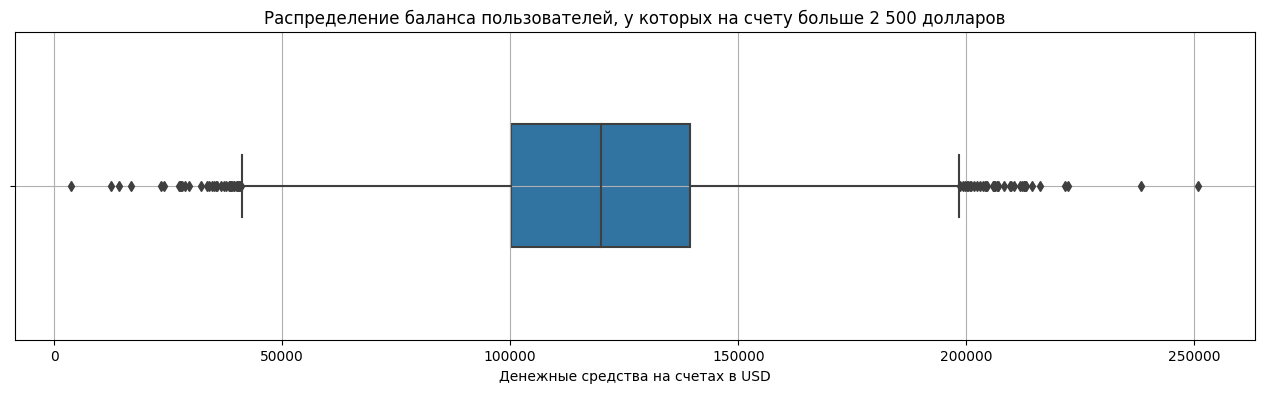

In [213]:
fig = plt.figure(figsize=(16, 4))
boxplot = sns.boxplot(
    data=churn_data_2,
    x='Balance',
    orient='h',
    width=0.4
)
boxplot.set_title('Распределение баланса пользователей, у которых на счету больше 2 500 долларов');
boxplot.set_xlabel('Денежные средства на счетах в USD');
boxplot.grid()

На графиках видно, что половина всех клиентов имеют на счетах  от 100 до 140 тысяч долларов. Остальные клиенты в основном имеют на счетах либо от 40 до 100 тыс долларов, либо от 140 до почти 200 тыс долларов. Есть крайне небольшое количество клиентов на счетах которых менее 40 тысяч долларов, и более 200 тысяч долларов. Отсюда можно выделить несколько групп клиентов, с разной степенью влияния на какой либо прогноз поведения. 
1 группа с остатком на счете от 100-140 тыс долларов влияет больше всех остальных групп.
2 группа (40-100 тыс долларов) и 3 группа (140-200 тыс долларов) влияют примерно одинаково сильно, но слабее чем 1 группа.
В 4ю группу можно выделить всех оставшихся клиентов, их влияние будет крайне мало.

9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока.
Как различаются суммы на накопительном счёте ушедших и лояльных клиентов?
Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

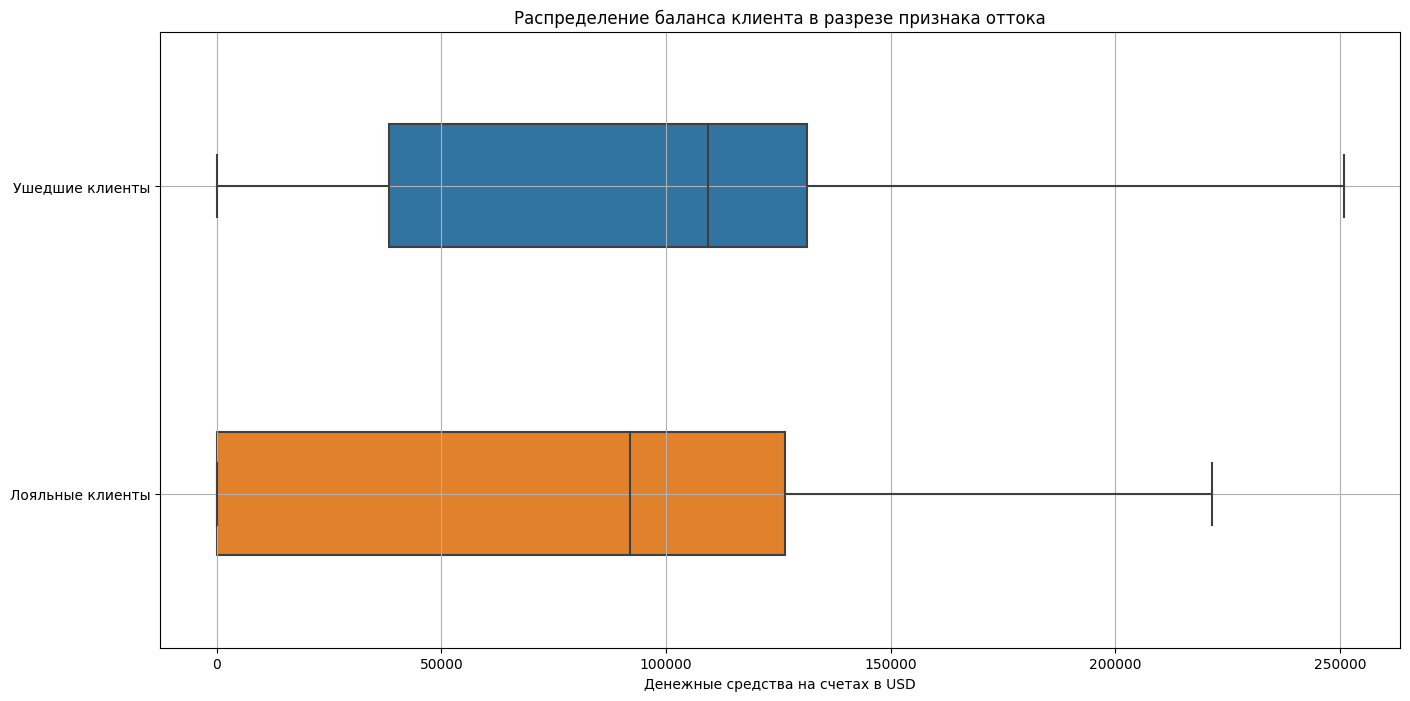

In [214]:
fig = plt.figure(figsize=(16, 8))
boxplot = sns.boxplot(
    data=churn_data_1,
    y='Exited',
    x='Balance',
    orient='h',
    width=0.4
)
boxplot.set_title('Распределение баланса клиента в разрезе признака оттока');
boxplot.set_xlabel('Денежные средства на счетах в USD');
boxplot.set_ylabel('');
boxplot.grid()

Здесь мы видим, что суммы на счетах ушедших клиентов больше чем у лояльных клиентов. Медианное значение больше на 20 тыс долларов и составляет порядка 175 тыс долларов. 
1. Поскольку, в большинстве случаев банк покидают клиенты, с относительно большим количеством денежных средств на счетах, мы можем предположить, что их не устраивает как их деньги работают. Возможно на рынке банковских услуг есть банки с более привлекательными ставками по депозитам.
2. Так же возможно у банка есть ограничения, лимиты либо комиссии, при работе с крупными суммами клиентов. В связи с этим вполне возможно клиенты будут искать банки с более лучшими условиями. 

9.4. Посмотрите на распределение возраста в разрезе признака оттока. 
В какой группе больше потенциальных выбросов? 
На какую возрастную категорию клиентов стоит обратить внимание банку?

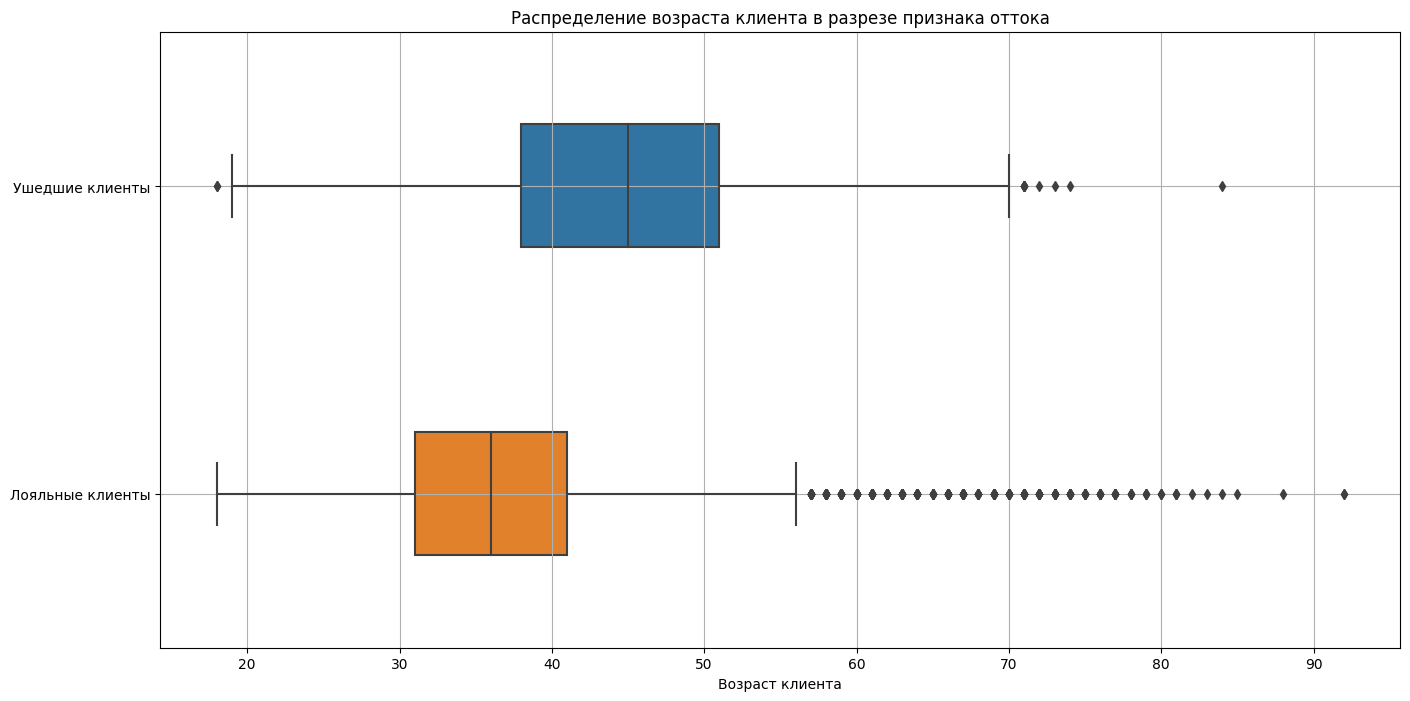

In [215]:
fig = plt.figure(figsize=(16, 8))
boxplot = sns.boxplot(
    data=churn_data_1,
    y='Exited',
    x='Age',
    orient='h',
    width=0.4
)
boxplot.set_title('Распределение возраста клиента в разрезе признака оттока');
boxplot.set_xlabel('Возраст клиента');
boxplot.set_ylabel('');
boxplot.grid()

На данном графике мы наблюдаем, что большая часть потенциальных выбросов сосредоточена среди клиентов приклонного или пенсионного возраста. 
Опять же среди ушедших клиентов средний возраст выше, чем среди оставшихся. Банку необходимо обратить внимание на возрастную группу 37-52 лет. Большинство ушедших клиентов именно в этой возрастной группе.

9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

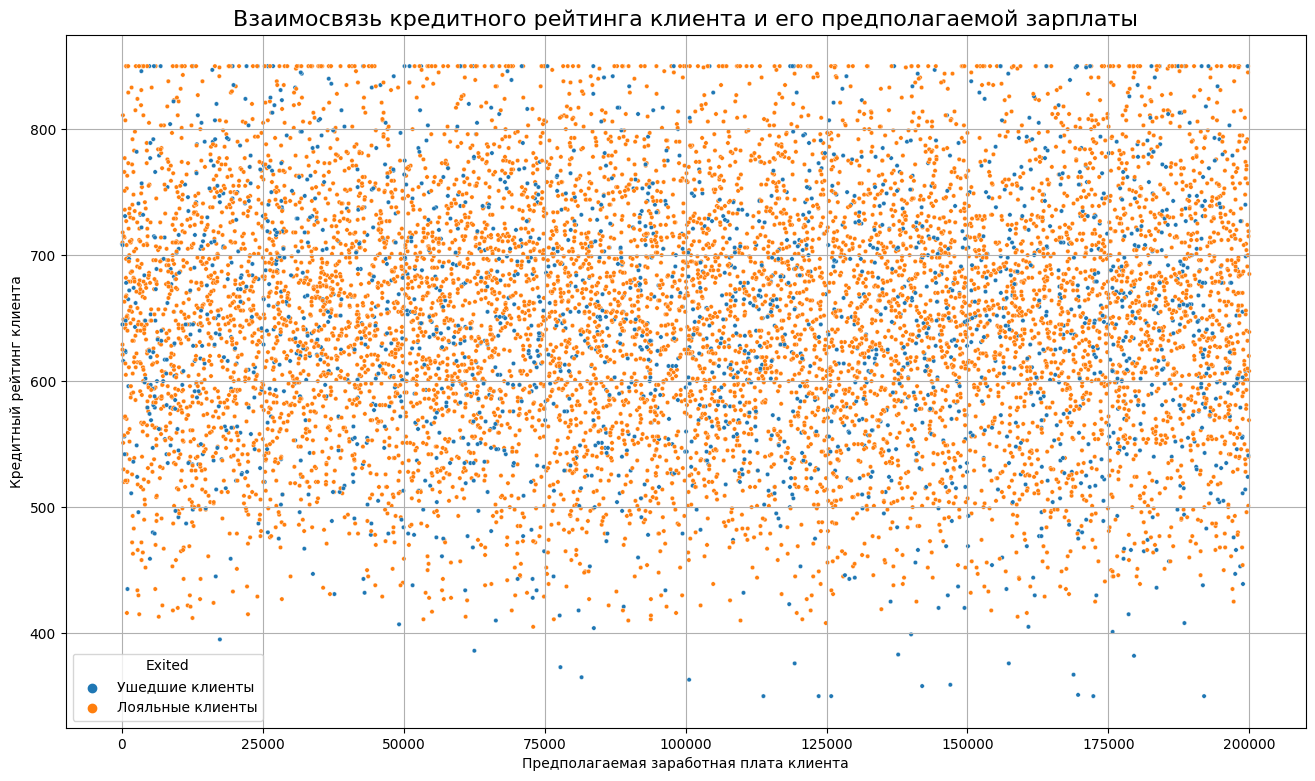

In [216]:
penguins_df = sns.load_dataset("penguins")

fig = plt.figure(figsize=(16, 9))

scatterplot = sns.scatterplot(
    data=churn_data_1,
    x='EstimatedSalary',
    y='CreditScore',
    hue='Exited',
    s=10,
    sizes=(50, 50)

)
scatterplot.set_title('Взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты', fontsize=16)
scatterplot.set_xlabel('Предполагаемая заработная плата клиента')
scatterplot.set_ylabel('Кредитный рейтинг клиента')
scatterplot.grid()

Явной взаимосвязи кредитного рейтинга, предполагаемой заработной платы в разрезе ушедших и лояльных клиентов не наблюдается. 
1. Интересно что все клиенты с разным уровнем предполагаемой зарплаты с кредитным рейтингом менее 400 ушли.
2. Большинство клиентов с рейтингом 800 и более остались лояльными.
Пажалуй это все выводы, которые можно сделать из данного графика. 

9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

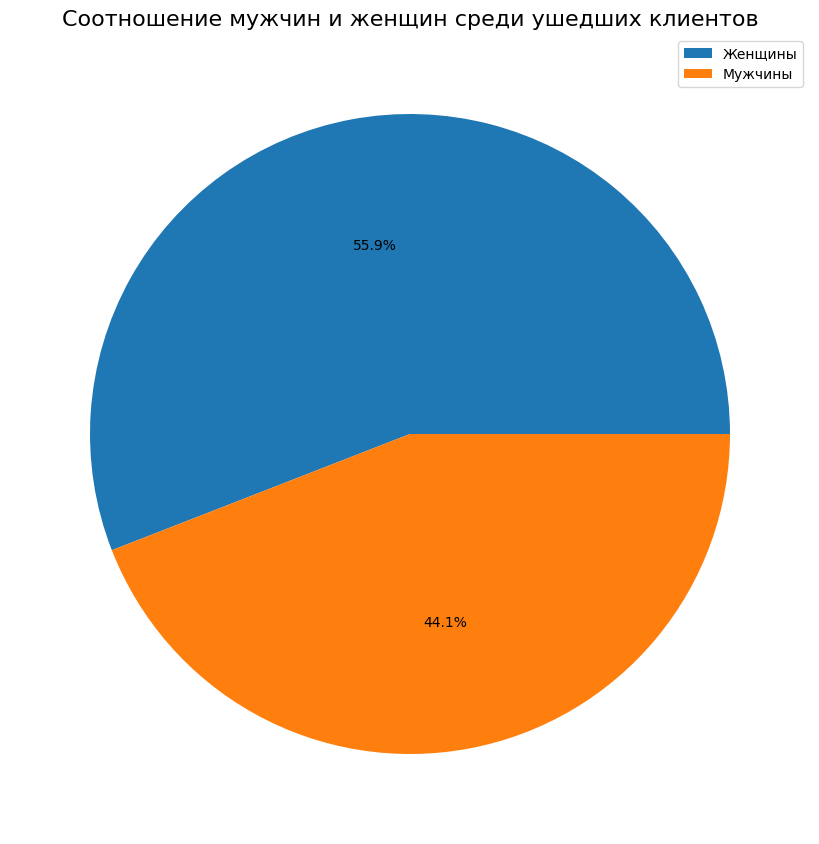

In [234]:
churn_data_1['Gender'] = churn_data_1['Gender'].replace(['Female', 'Male'],['Женщины', 'Мужчины'])

menwomen_clients = churn_data_1[churn_data_1['Exited'] == 'Ушедшие клиенты']

exitmenwomen = menwomen_clients['Gender'].value_counts()
fig = plt.figure(figsize=(8, 8))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    exitmenwomen,
    autopct='%.1f%%'
);
axes.set_title('Соотношение мужчин и женщин среди ушедших клиентов', fontsize=16)
axes.legend(exitmenwomen.index)

На графике видно что клиенты женского пола уходят немного чаще чем мужчины. 

9.7. Как отток клиентов зависит от числа приобретённых у банка услуг? 
Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

In [218]:
pivot_1

Exited,Лояльные клиенты,Ушедшие клиенты
NumOfProducts,,
1,3675.0,1409.0
2,4242.0,348.0
3,46.0,220.0
4,NaN,60.0


Text(0, 0.5, 'Количество клиентов')

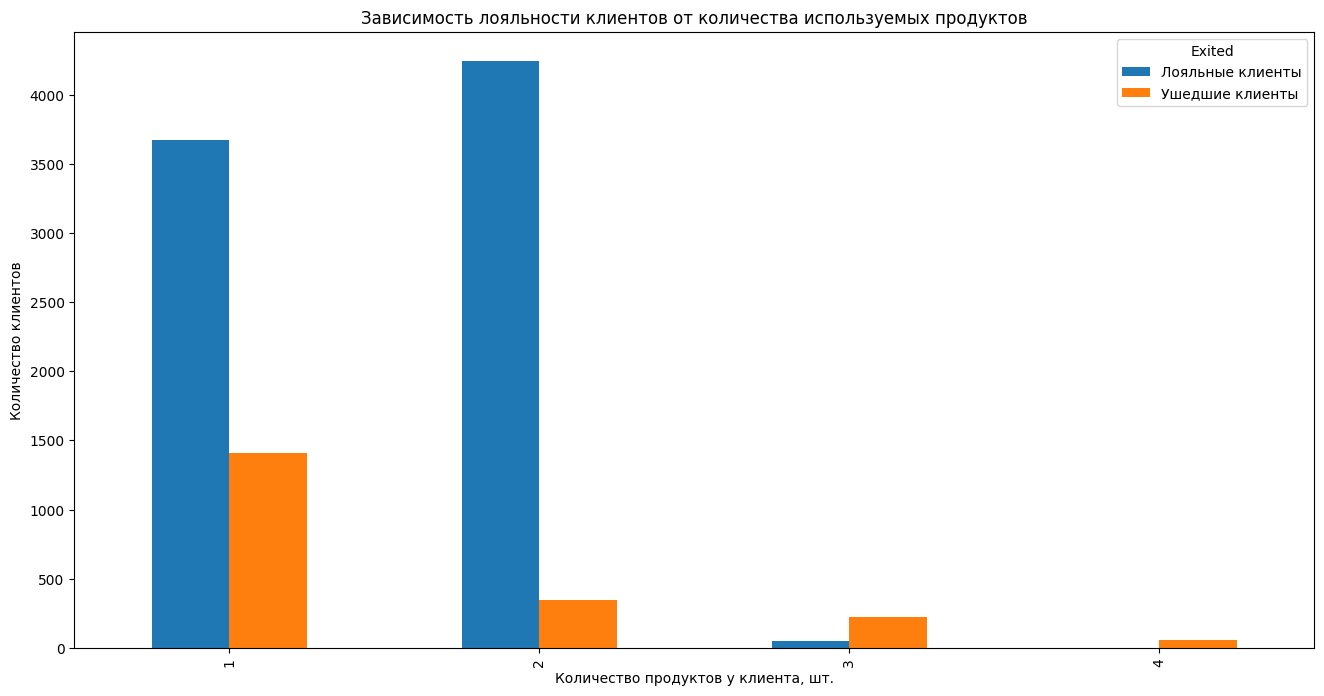

In [219]:
pivot_1 = churn_data_1.pivot_table(
    'CustomerId',
    index='NumOfProducts',
    columns='Exited',
    aggfunc='count'
)

fig_7, axes_7 = plt.subplots(figsize=(16, 8))
pivot_1.plot(
    kind='bar',
    ax=axes_7
)
axes_7.set_title('Зависимость лояльности клиентов от количества используемых продуктов')
axes_7.set_xlabel('Количество продуктов у клиента, шт.')
axes_7.set_ylabel('Количество клиентов')

Из этой диаграммы мы видим, что среди клиентов, которые пользовались одним продуктом, ушли около 30%, двумя - ушли около 7%. Из тех кто пользовался 3 и 4 продуктами почти все ушли. Остались около 15%. Конечно в количественном выражении таких клиентов очень мало. Но для модели предсказания ухода, данная информация может быть полезна. 

9.8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

Text(0, 0.5, 'Количество клиентов')

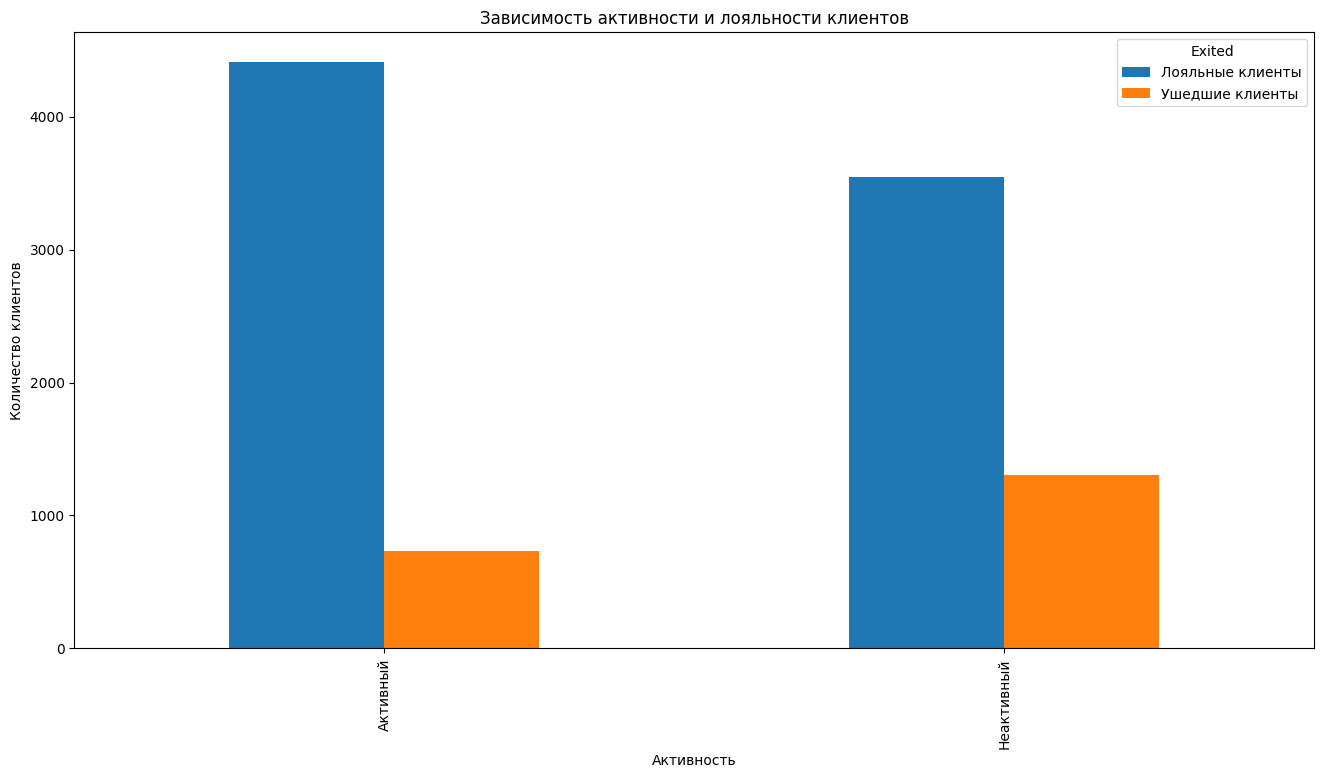

In [220]:
churn_data_1['IsActiveMember'] = churn_data_1['IsActiveMember'].replace([0, 1],['Неактивный', 'Активный'])


pivot_2 = churn_data_1.pivot_table(
    'CustomerId',
    index='IsActiveMember',
    columns='Exited',
    aggfunc='count'
)

fig_7, axes_7 = plt.subplots(figsize=(16, 8))
pivot_2.plot(
    kind='bar',
    ax=axes_7
)
axes_7.set_title('Зависимость активности и лояльности клиентов')
axes_7.set_xlabel('Активность')
axes_7.set_ylabel('Количество клиентов')

Здесь мы наблюдаем, что отток среди активных клиентов ниже чем среди неактивных. Чтобы уменьшить поток среди неактивных. я бы предложил банку разработать и провести мероприятия, для перехода клиентов из статуса неактивных в активных. Вероятность ухода тогда, очевидно уменьшится. 

9.9. В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

In [221]:
pivot_3 = churn_data_1.pivot_table(
    'CustomerId',
    index='Geography',
    columns='Exited',
    aggfunc='count'
)
pivot_3['Доля ушедших клиентов'] = (100 * pivot_3['Ушедшие клиенты']/(pivot_3['Ушедшие клиенты'] + pivot_3['Лояльные клиенты'])).round(2) 
pivot_3

Exited,Лояльные клиенты,Ушедшие клиенты,Доля ушедших клиентов
Geography,,,
France,4204,810,16.15
Germany,1695,814,32.44
Spain,2064,413,16.67


In [222]:
fig = px.choropleth(
    data_frame=pivot_3, 
    locations=pivot_3.index, 
    locationmode = "country names", 
    color="Доля ушедших клиентов", 
    range_color=[0, 35],
    title='Доля ушедших клиентов по странам', 
    width=1100, 
    height=500,
    color_continuous_scale='Reds' 
)

fig.show()

На тепловой карте мира наблюдается, что в Германии самый большой отток клиентов. Исходя из более высокой прогматичности немцев (как принято считать), рискну предположить, что услуги банка проигрывают конкуренцию другим банкам, из за чего прогматичные немцы уходят, быстрее чем французы и испанцы.

9.10. Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.

Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.

На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.


In [223]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"

In [224]:
churn_data_2 = churn_data.copy()

In [225]:
churn_data_2['CreditScoreCat'] = churn_data_2['CreditScore'].apply(get_credit_score_cat)

In [226]:
churn_data_2

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,CreditScoreCat
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Fair
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Fair
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Poor
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,Good
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Excellent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,Good
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,Poor
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,Good
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,Good


In [227]:
pivot_4 = churn_data_2.pivot_table(
    'Exited',
    index='CreditScoreCat',
    columns='Tenure',
    aggfunc='mean'
).round(2)
pivot_4

Tenure,0,1,2,3,4,5,6,7,8,9,10
CreditScoreCat,,,,,,,,,,,
Excellent,0.28,0.21,0.14,0.17,0.13,0.23,0.24,0.13,0.20,0.27,0.25
Fair,0.22,0.22,0.21,0.22,0.20,0.21,0.24,0.17,0.21,0.19,0.21
Good,0.20,0.20,0.19,0.21,0.20,0.21,0.18,0.19,0.15,0.19,0.20
Poor,0.23,0.26,0.21,0.21,0.23,0.20,0.18,0.15,0.21,0.25,0.17
Very_Poor,0.44,0.25,0.15,0.29,0.29,0.15,0.23,0.21,0.25,0.23,0.33


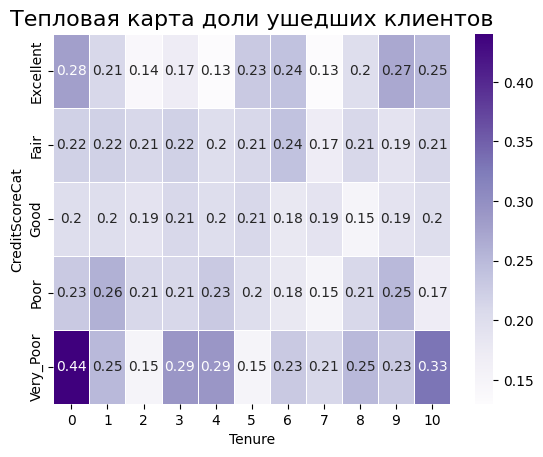

In [228]:
heatmap = sns.heatmap(data=pivot_4, cmap='Purples', annot=True, linewidth=.5)
heatmap.set_title('Тепловая карта доли ушедших клиентов', fontsize=16);

Чаще всего уходят клиенты с самым низким кредитным рейтингом 'Very_Poor'. Но в количественном выражении, как мы видим на графике в задании 9.5, это крайне малое количество клиентов.  